## Task 5

T1-T4. Completed

T5. Choose two kinds of representative distances/features that you think may be most important for stance detection and plot the distance distribution for the four stances. Comment on why you think these are the important features and try to validate their importance using the data.

We treat consine similarity as Feature 0, and will create other features in this section

In [114]:
import numpy as np
import pandas as pd
from numpy import dot
from numpy.linalg import norm

import re

#import libraries for data processing
import nltk
from nltk import FreqDist, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

#import libraries for vectorisation
import gensim
from gensim.models import Word2Vec

#train validation set split
from sklearn.model_selection import train_test_split

#cosice distance
from sklearn.metrics.pairwise import paired_cosine_distances

#Counter for count word frequency
from collections import Counter

#import tqdm for feature construction
from tqdm import tqdm

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set_style("white")  

#math for calculation
import math


#import the training set which have been constructed with tfidf vectors
Pred_Train_features = pd.read_csv('/Users/weisihan/Downloads/fnc-1-master/final/Pred_Train_features.csv')

In [5]:
Pred_Train_features.head()

,Headline,Body_ID,articleBody,Stance,cos_sim_w2v,cos_sim_tfidf,overlap,polar_h,polar_b,P_Cor_Coe_w2c,P_Cor_Coe_tfidf,Euc_distance_w2c,Euc_distance_tfidf,kl_dis,LM_kld
0,police find mass graf least body near mexico t...,712,danny boyle directing untitled film seth rogen...,unrelated,-0.243617,-2.220446e-16,0.000000,0,0,-0.234044,-0.001445,1.577097,1.117929,118.890038,2.200789
1,seth rogen play apple steve wozniak,712,danny boyle directing untitled film seth rogen...,discuss,0.851035,3.301286e-01,0.065217,0,0,0.849136,0.329755,0.545830,1.447857,8.457826,0.401247
2,mexico police find mass grave near site studen...,712,danny boyle directing untitled film seth rogen...,unrelated,-0.174214,-2.220446e-16,0.000000,0,0,-0.162194,-0.001232,1.532458,1.333335,125.972584,1.906259
3,mexico say missing student found first mass graf,712,danny boyle directing untitled film seth rogen...,unrelated,-0.041024,2.126375e-02,0.020408,0,0,-0.036997,0.020160,1.442931,1.244375,95.600490,1.499927
4,new io bug delete icloud document,712,danny boyle directing untitled film seth rogen...,unrelated,0.318279,0.000000e+00,0.000000,0,0,0.316359,-0.001007,1.167665,1.941065,158.295416,1.596671


### Create Functions to Plot the Feature Distribution

In [7]:
# Plot the overall frequency distribution
def overall_dist(list_of_number, feature_name):
    plt.figure(figsize = (5, 5))
    sns.distplot(list_of_number, kde=False,  bins=100, color="b", fit=stats.norm)
    plt.title('The Distribution of the '+ feature_name)
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')

In [20]:
# Plot the frequency distribution of the four class (Plot seperately)
def four_class_dist(agree, disagree, discuss, unrelated, xlim1,xlim2,feature_name):
    
    plt.figure(figsize = (10, 10))
    
    plt.subplot(2, 2, 1)
    sns.distplot(agree, kde=False,  bins=100, color="olive", label='Agree')
    plt.title('Agree Class')
    plt.xlabel(feature_name)
    plt.xlim(xlim1, xlim2)
    plt.ylabel('Frequency')
    
    
    plt.subplot(2, 2, 2)
    sns.distplot(disagree, kde=False,  bins=100, color="red", label = 'Disagree')
    plt.title('Disagree Class')
    plt.xlabel(feature_name)
    plt.xlim(xlim1, xlim2)
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    sns.distplot(discuss, kde=False,  bins=100, color="orange",  label = 'Discuss')
    plt.title('Discuss Class')
    plt.xlabel(feature_name)
    plt.xlim(xlim1, xlim2)
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    sns.distplot(unrelated, kde=False, color="skyblue",  label = 'Unrelated')
    plt.title('Unrelated Class')
    plt.xlabel(feature_name)
    plt.xlim(xlim1, xlim2)
    plt.ylabel('Frequency')

    plt.show()

In [32]:
# Plot the frequency distribution of four classes in one graph
def four_class_dist_inone(agree, disagree, discuss, unrelated, ylim, feature_name):
    plt.figure(figsize = (13, 3))

    sns.distplot(unrelated, kde=False,  bins=100, color="skyblue",  label = 'Unrelated')
    sns.distplot(discuss, kde=False,  bins=100, color="orange",  label = 'Discuss')
    sns.distplot(agree, kde=False,  bins=100, color="olive", label='Agree')
    sns.distplot(disagree, kde=False,  bins=100, color="red", label = 'Disagree')

    plt.title('The Distribution of the '+feature_name+' for the Four Class')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.ylim(0,ylim)
    plt.legend()
    plt.show()

#### Feature 1. Cosine Similarity

In [43]:
cos_sim_tfidf = Pred_Train_features['cos_sim_tfidf']

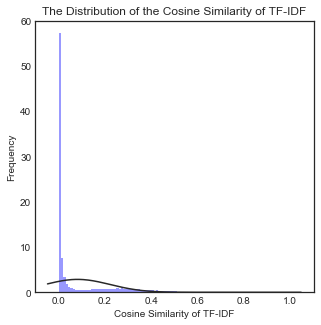

In [44]:
overall_dist(cos_sim_tfidf, 'Cosine Similarity of TF-IDF')

In [45]:
cos_agree = list(Pred_Train_features[Pred_Train_features['Stance']=='agree']['cos_sim_tfidf'])
cos_disagree = list(Pred_Train_features[Pred_Train_features['Stance']=='disagree']['cos_sim_tfidf'])
cos_discuss = list(Pred_Train_features[Pred_Train_features['Stance']=='discuss']['cos_sim_tfidf'])
cos_unrelated = list(Pred_Train_features[Pred_Train_features['Stance']=='unrelated']['cos_sim_tfidf'])

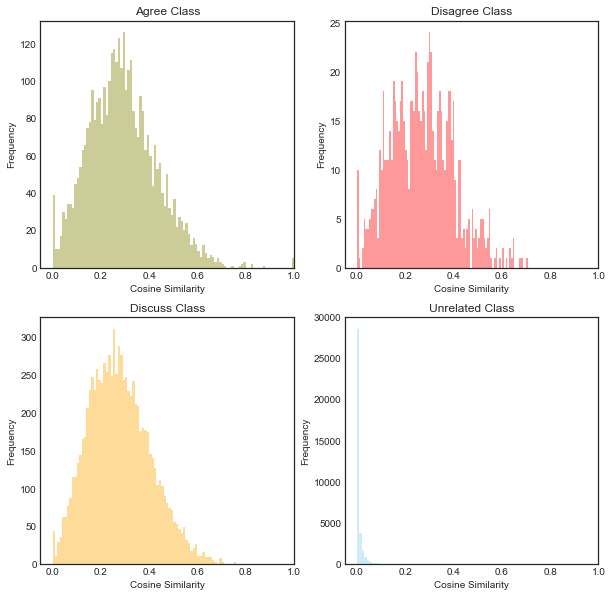

In [51]:
# Plot the Cosine Similarity frequency distribution of the four class
four_class_dist(cos_agree, cos_disagree, cos_discuss, cos_unrelated, -0.05,1, 'Cosine Similarity')

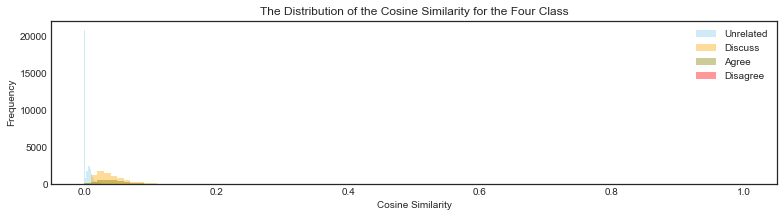

In [56]:
four_class_dist_inone(ovl_agree, ovl_disagree, ovl_discuss, ovl_unrelated,22000, 'Cosine Similarity')

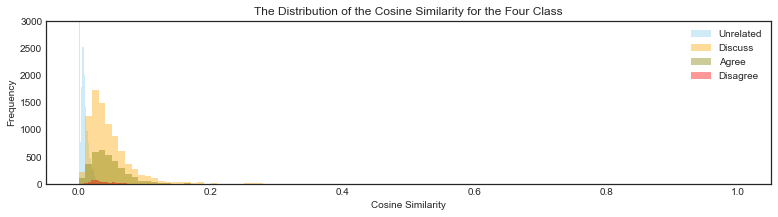

In [57]:
four_class_dist_inone(ovl_agree, ovl_disagree, ovl_discuss, ovl_unrelated,3000, 'Cosine Similarity')

#### Feature 2. Word Overlap

In [6]:
overlap=Pred_Train_features['overlap']

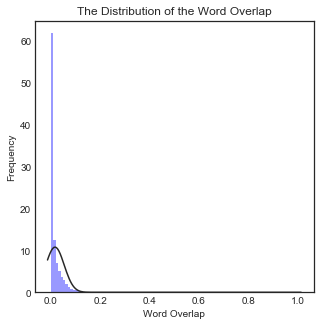

In [10]:
# Plot the frequency distribution
overall_dist(overlap, 'Word Overlap')

In [11]:
ovl_agree = list(Pred_Train_features[Pred_Train_features['Stance']=='agree']['overlap'])
ovl_disagree = list(Pred_Train_features[Pred_Train_features['Stance']=='disagree']['overlap'])
ovl_discuss = list(Pred_Train_features[Pred_Train_features['Stance']=='discuss']['overlap'])
ovl_unrelated = list(Pred_Train_features[Pred_Train_features['Stance']=='unrelated']['overlap'])

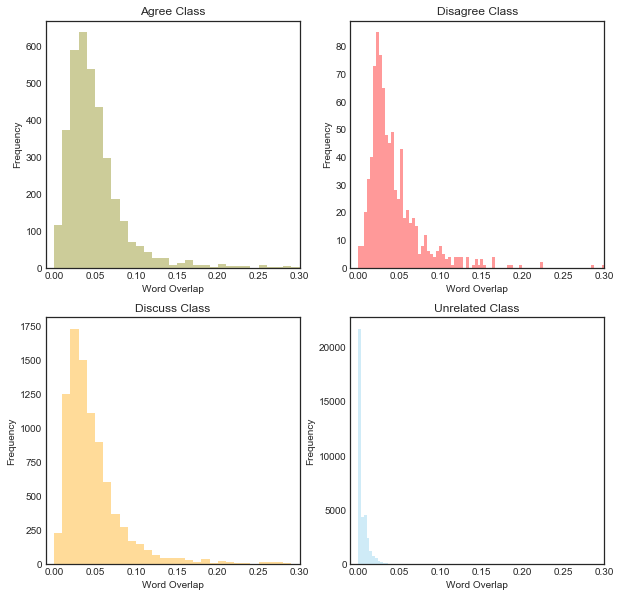

In [22]:
# Plot the Word Overlap frequency distribution of the four class
four_class_dist(ovl_agree, ovl_disagree, ovl_discuss, ovl_unrelated, -0.01,0.3, 'Word Overlap')

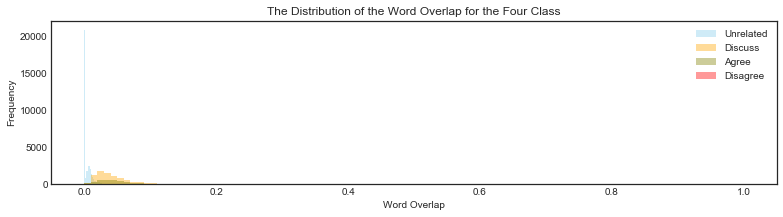

In [41]:
four_class_dist_inone(ovl_agree, ovl_disagree, ovl_discuss, ovl_unrelated,22000, 'Word Overlap')

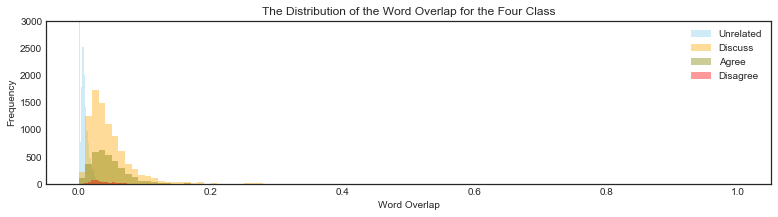

In [35]:
four_class_dist_inone(ovl_agree, ovl_disagree, ovl_discuss, ovl_unrelated,3000, 'Word Overlap')

### Feature3. Pearson Correlation Coefficient 

In [59]:
P_Cor_Coe_tfidf=Pred_Train_features['P_Cor_Coe_tfidf']

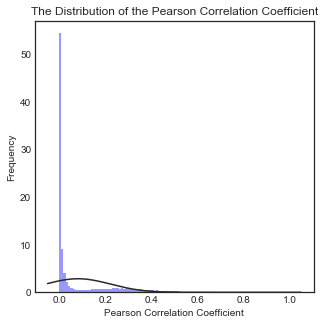

In [112]:
overall_dist(P_Cor_Coe_tfidf, 'Pearson Correlation Coefficient')

In [60]:
PCC_agree = list(Pred_Train_features[Pred_Train_features['Stance']=='agree']['P_Cor_Coe_tfidf'])
PCC_disagree = list(Pred_Train_features[Pred_Train_features['Stance']=='disagree']['P_Cor_Coe_tfidf'])
PCC_discuss = list(Pred_Train_features[Pred_Train_features['Stance']=='discuss']['P_Cor_Coe_tfidf'])
PCC_unrelated = list(Pred_Train_features[Pred_Train_features['Stance']=='unrelated']['P_Cor_Coe_tfidf'])

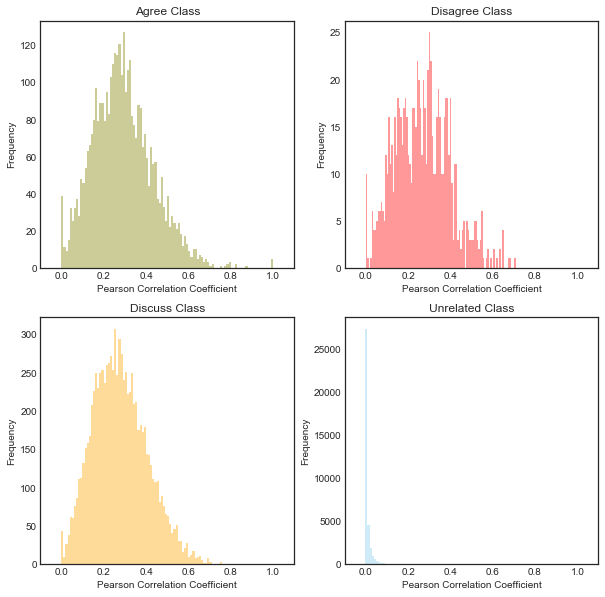

In [65]:
# Plot the Word Overlap frequency distribution of the four class
four_class_dist(PCC_agree, PCC_disagree, PCC_discuss, PCC_unrelated, -0.1,1.1, 'Pearson Correlation Coefficient')

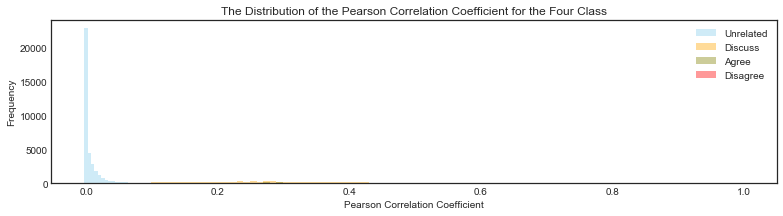

In [68]:
four_class_dist_inone(PCC_agree, PCC_disagree, PCC_discuss, PCC_unrelated,24000, 'Pearson Correlation Coefficient')

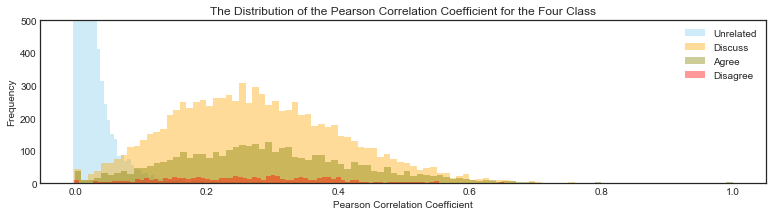

In [73]:
four_class_dist_inone(PCC_agree, PCC_disagree, PCC_discuss, PCC_unrelated,500, 'Pearson Correlation Coefficient')

### Feature4. KL

In [102]:
LM_kld=Pred_Train_features['LM_kld']

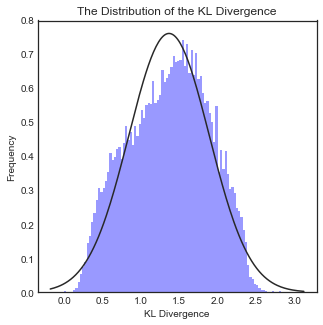

In [110]:
overall_dist(LM_kld, 'KL Divergence')

In [104]:
LM_kld.describe()

count    49972.000000
mean         1.368269
std          0.524239
min          0.000000
25%          0.968157
50%          1.401242
75%          1.766870
max          2.946792
Name: LM_kld, dtype: float64

In [105]:
LM_kld_agree = list(Pred_Train_features[Pred_Train_features['Stance']=='agree']['LM_kld'])
LM_kld_disagree = list(Pred_Train_features[Pred_Train_features['Stance']=='disagree']['LM_kld'])
LM_kld_discuss = list(Pred_Train_features[Pred_Train_features['Stance']=='discuss']['LM_kld'])
LM_kld_unrelated = list(Pred_Train_features[Pred_Train_features['Stance']=='unrelated']['LM_kld'])

In [106]:
len(LM_kld_agree)

3678

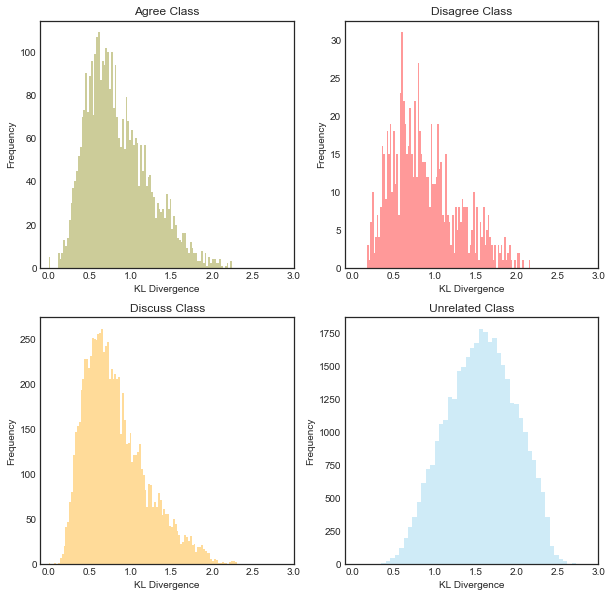

In [107]:
# Plot the Word Overlap frequency distribution of the four class
four_class_dist(LM_kld_agree, LM_kld_disagree, LM_kld_discuss, LM_kld_unrelated, -0.1,3, 'KL Divergence')

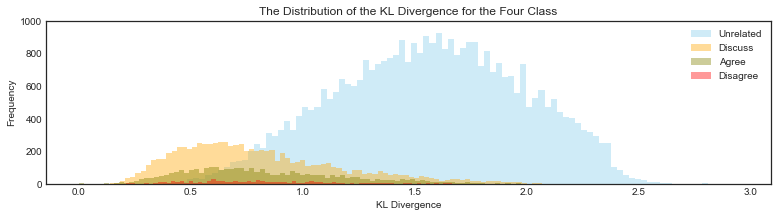

In [109]:
# Plot the Word Overlap frequency distribution of the four class
four_class_dist_inone(LM_kld_agree, LM_kld_disagree, LM_kld_discuss, LM_kld_unrelated,1000, 'KL Divergence')

### Feature5. Polarity 

In [75]:
polar_h_agree = list(Pred_Train_features[Pred_Train_features['Stance']=='agree']['polar_h'])
polar_h_disagree = list(Pred_Train_features[Pred_Train_features['Stance']=='disagree']['polar_h'])
polar_h_discuss = list(Pred_Train_features[Pred_Train_features['Stance']=='discuss']['polar_h'])
polar_h_unrelated = list(Pred_Train_features[Pred_Train_features['Stance']=='unrelated']['polar_h'])

In [76]:
polar_b_agree = list(Pred_Train_features[Pred_Train_features['Stance']=='agree']['polar_b'])
polar_b_disagree = list(Pred_Train_features[Pred_Train_features['Stance']=='disagree']['polar_b'])
polar_b_discuss = list(Pred_Train_features[Pred_Train_features['Stance']=='discuss']['polar_b'])
polar_b_unrelated = list(Pred_Train_features[Pred_Train_features['Stance']=='unrelated']['polar_b'])

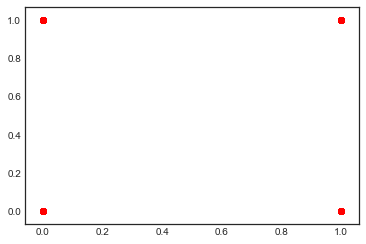

In [113]:
from numpy import *;

x = polar_h_agree 
y = polar_b_agree 
plt.scatter(x, y,  c='r', alpha=0.5)

x = polar_h_agree
y = polar_b_agree 
plt.scatter(x, y,  c='r', alpha=0.5)


plt.show()